In [1]:
# Resources used for leanring:
# https://www.datacamp.com/tutorial/the-cross-entropy-loss-function-in-machine-learning
# https://medium.com/@vijendra1125/understanding-entropy-cross-entropy-and-softmax-3b79d9b23c8a# https://medium.com/@ayush2991/understanding-cross-entropy-kl-divergence-d6b99f770f37

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [23]:
# Create a sample dataset
# create training data
# generates a synthetic binary classification dataset with 10,000 samples, 20 features (10 informative)
X, y = make_classification(
    n_samples=10000,
    n_informative=10,
    random_state=2022
)

In [24]:
# split into train and test
X_new, X_test = X[:9000, :], X[9000:, :]
y_new, y_test = y[:9000], y[9000:]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_new, y_new,
    test_size=0.3
)

In [26]:
print(f"Train data: {X_train.shape}\n\
Train labels: {y_train.shape}\n\
Test data: {X_test.shape}\n\
Test labels: {y_test.shape}")

Train data: (6300, 20)
Train labels: (6300,)
Test data: (1000, 20)
Test labels: (1000,)


In [36]:
#Create a simple NN model in TensorFlow

# Input (data placeholder, not counted as a Dense layer)

# Hidden layer 1 → Dense(10, ReLU)

# Hidden layer 2 → Dense(10, ReLU)

# Output layer → Dense(1, Sigmoid)

# model = tf.keras.Sequential([
#                             tf.keras.layers.Dense(10, input_shape = (X_train.shape[1],), activation = "relu"),
#                             tf.keras.layers.Dense(10, activation = "relu"),
#                             tf.keras.layers.Dense(1, activation = "sigmoid")])
model = tf.keras.Sequential([
                            tf.keras.Input(shape = (X_train.shape[1],)),
                            tf.keras.layers.Dense(10, activation = "relu"),
                            tf.keras.layers.Dense(10, activation = "relu"),
                            tf.keras.layers.Dense(1, activation = "sigmoid")
                            ])

model.compile(
    loss = "binary_crossentropy", # loss function here is the binary cross entropy
    optimizer = "adam",
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs=20, validation_data=[X_val, y_val], verbose=0)
    

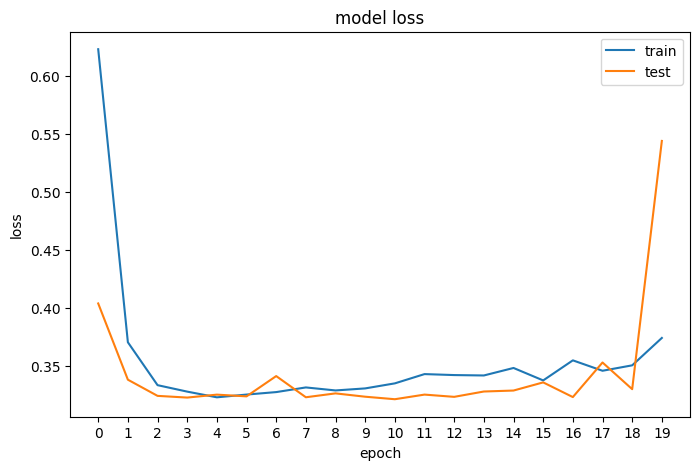

In [37]:
# Plot the model to see if its imporving

# plotting the loss of the models

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0,20, step=1))
plt.legend(['train', 'test'], loc='upper right')
plt.show()